<a href="https://colab.research.google.com/github/neharikajsh/Fraud_Detection/blob/main/Fradulent_Transactions_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Transactions: Fraudulent or not?

## Dataset


In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [175]:
data = pd.read_csv("https://raw.githubusercontent.com/neharikajsh/Fraud_Detection/main/transactions.csv", index_col=0)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [176]:
data['type'].value_counts()

type
PAYMENT     73427
CASH_OUT    66488
CASH_IN     41579
TRANSFER    16836
DEBIT        1670
Name: count, dtype: int64

# **Data Preprocessing**

##**Are there any null values?**

In [177]:
nulls = data.isna().sum(axis=0).sort_values(ascending=False);
nulls

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

**There are no null values.**

---

In [178]:
data.describe()
# data.isFraud.value_counts()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,200000.00000,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,200000.000000
mean,10.06589,1.808112e+05,8.821957e+05,9.001938e+05,9.411592e+05,1.191866e+06,0.000735
std,2.12174,3.291800e+05,2.766264e+06,2.803759e+06,2.373010e+06,2.655236e+06,0.027101
min,1.00000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,9.00000,1.201612e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,10.00000,6.872104e+04,1.951000e+04,0.000000e+00,5.055850e+04,1.320839e+05,0.000000
75%,12.00000,2.290791e+05,1.915686e+05,2.275212e+05,7.645361e+05,1.189164e+06,0.000000
max,13.00000,1.000000e+07,3.893942e+07,3.894623e+07,3.903958e+07,3.904248e+07,1.000000


isFraud
0    199853
1       147
Name: count, dtype: int64

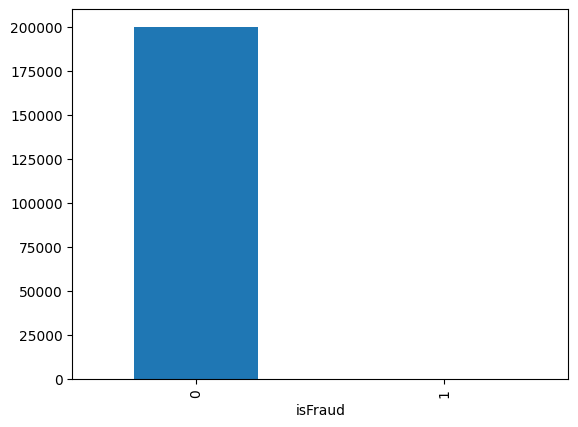

In [179]:
data['isFraud'].value_counts().plot(kind='bar')
data['isFraud'].value_counts()

In [180]:
print('Proportion of Not Frauds: {:.2f}%'.format(data['isFraud'].value_counts()[0]/data['isFraud'].size * 100))
print('Proportion of Frauds: {:.2f}%'.format(data['isFraud'].value_counts()[1]/data['isFraud'].size * 100))

Proportion of Not Frauds: 99.93%
Proportion of Frauds: 0.07%


### Under Sampling

Balance classes using under sampling

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,128863.46,C22567893,11934.00,0.00,C1137350304,83794.36,212657.82,0
1,11,CASH_OUT,311838.11,C365327810,3508942.66,3197104.55,C576744195,383602.23,746589.77,0
2,8,PAYMENT,12072.32,C2002649883,0.00,0.00,M1595507682,0.00,0.00,0
3,3,CASH_IN,168479.08,C1644155208,6673926.97,6842406.06,C575335780,308642.49,140163.41,0
4,8,CASH_OUT,68648.39,C2040086517,0.00,0.00,C2109236648,1440213.37,2671632.43,0
...,...,...,...,...,...,...,...,...,...,...
289,13,CASH_OUT,408.00,C1894004688,408.00,0.00,C1293978242,898297.85,1075854.14,1
290,13,TRANSFER,48375.02,C920803432,48375.02,0.00,C1767389067,0.00,0.00,1
291,13,CASH_OUT,48375.02,C1894578299,48375.02,0.00,C590035788,374803.26,658520.33,1
292,13,TRANSFER,4022667.54,C735463888,4022667.54,0.00,C1548348754,0.00,0.00,1


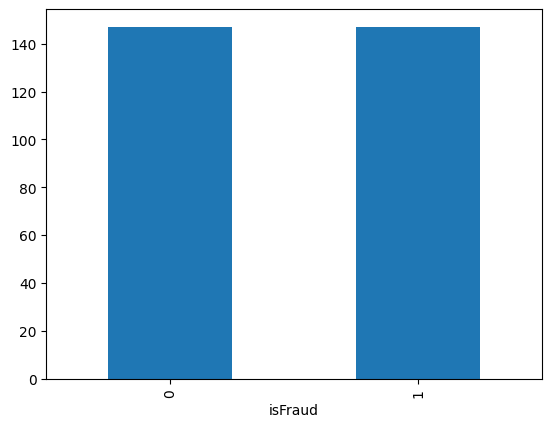

In [181]:
fraud_count = len(data[data['isFraud'] == 1])
not_fraud_count = len(data[data['isFraud'] == 0])

sampled_not_fraud = data[data['isFraud'] == 0].sample(n=fraud_count)
fraud = data[data['isFraud'] == 1]

sampled_not_fraud.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

balanced_data = pd.concat([sampled_not_fraud, fraud]).reset_index(drop=True);

balanced_data['isFraud'].value_counts().plot(kind='bar')
balanced_data

# Feature Correlation

By creating correlation maps we can identify features that are closely correlated with the legitimacy of our transactions. This can be a crucial step when performing dimensionality reduction, remoing/adding features.

<ipython-input-182-faa21f7bce84>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


<Axes: title={'center': 'Correlation matrix of sub-sampled data'}>

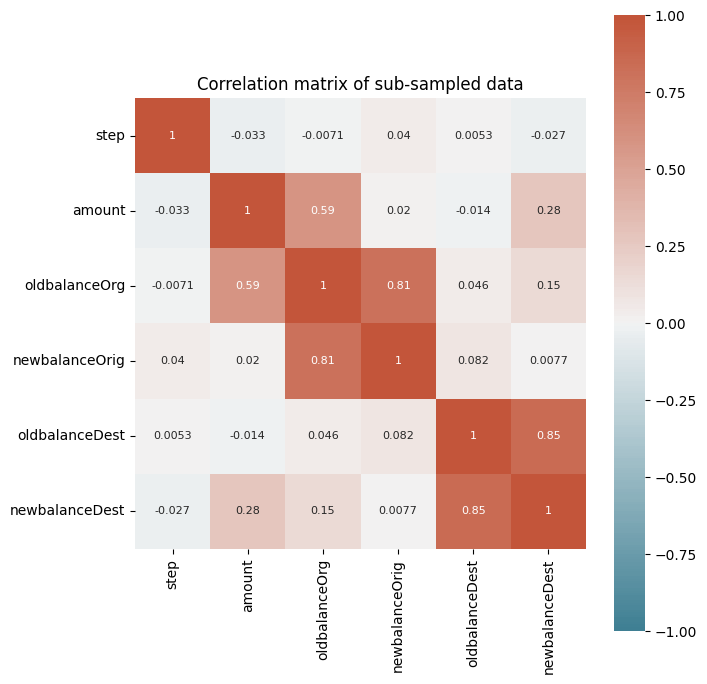

In [182]:
correlation = balanced_data[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']].corr()
f, ax = plt.subplots(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Correlation matrix of sub-sampled data')
sns.heatmap(correlation, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True, annot=True, annot_kws={"size": 8})

## Pair plotting

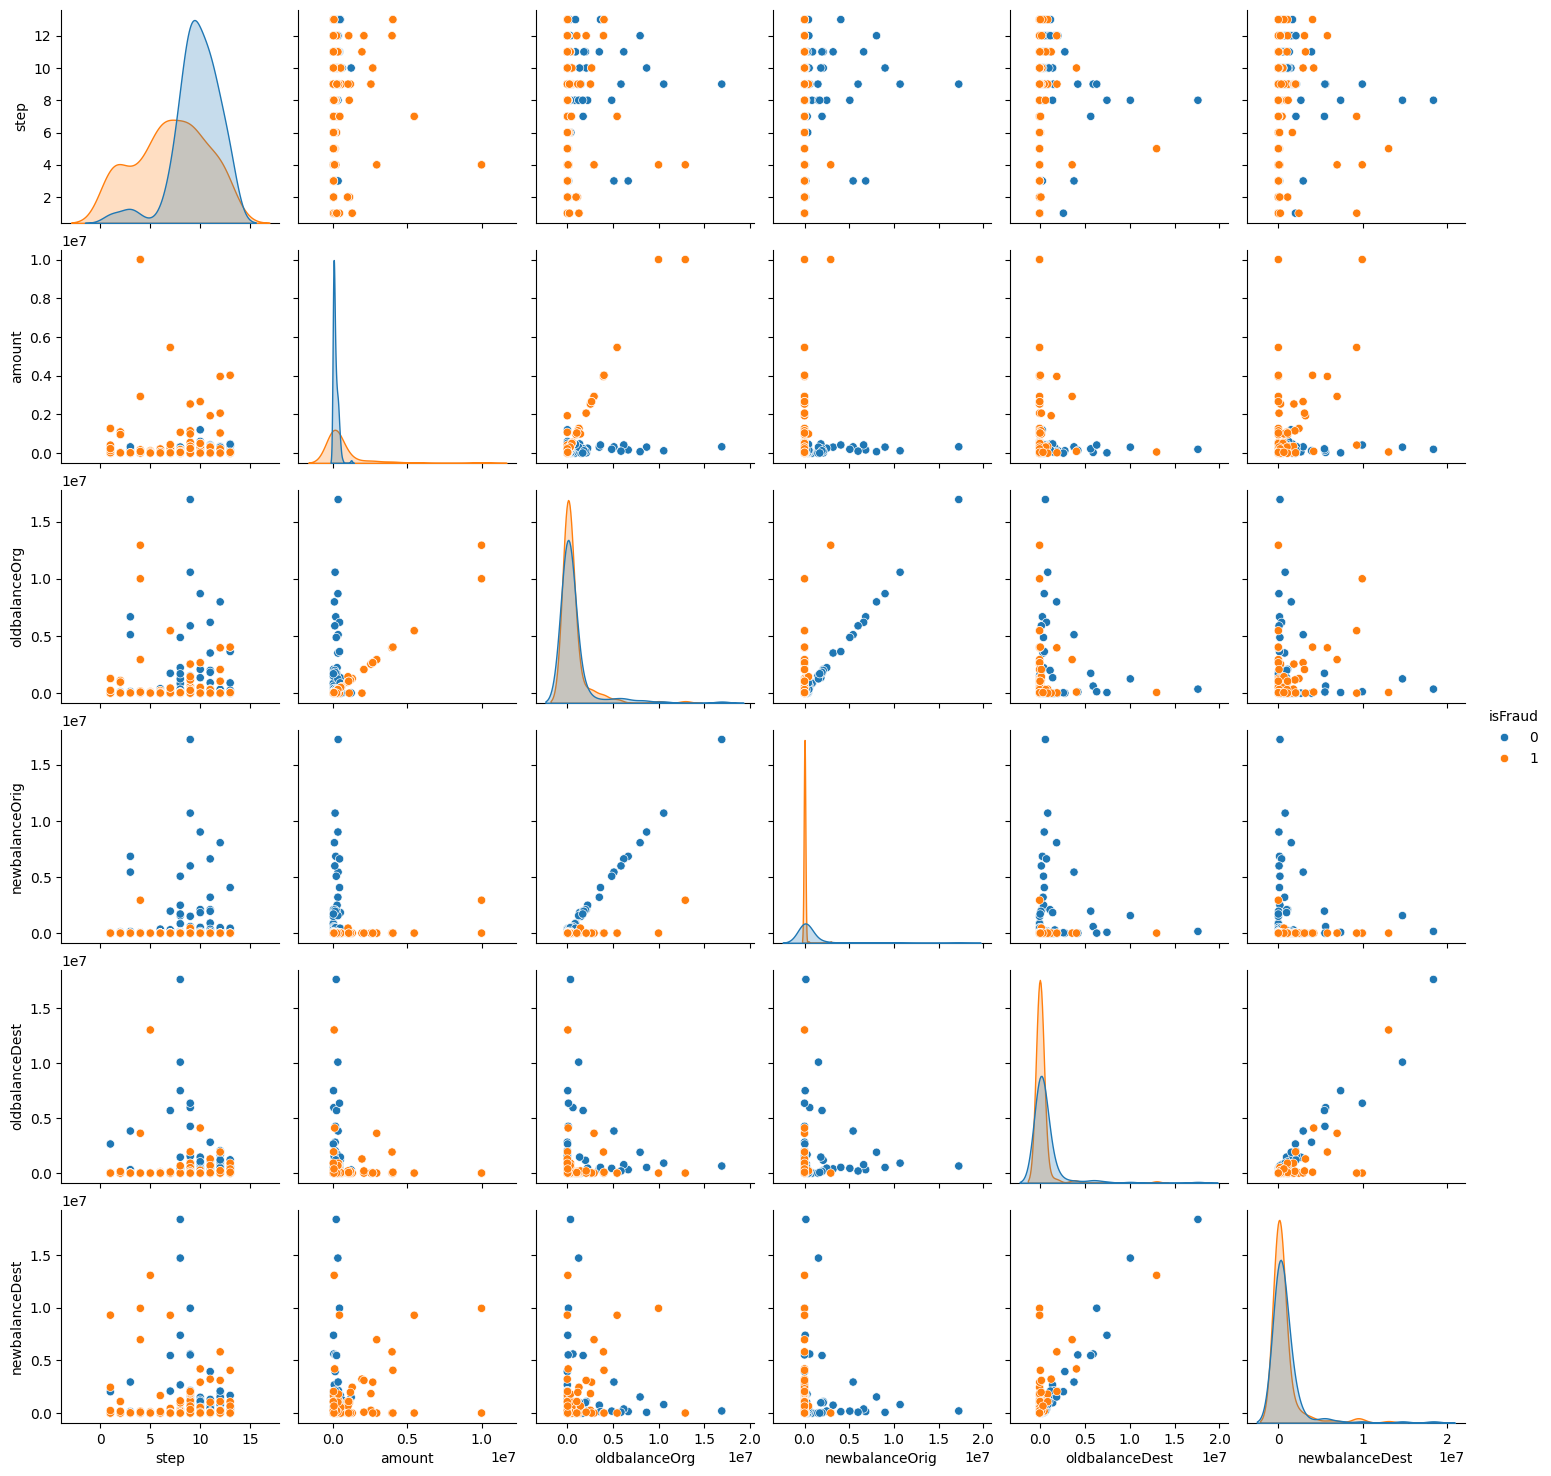

In [183]:
sns.pairplot(balanced_data,hue="isFraud")

## Feature Engineering

In [184]:
features = balanced_data.copy(deep=True)
features.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,8,CASH_OUT,128863.46,C22567893,11934.00,0.00,C1137350304,83794.36,212657.82,0
1,11,CASH_OUT,311838.11,C365327810,3508942.66,3197104.55,C576744195,383602.23,746589.77,0
2,8,PAYMENT,12072.32,C2002649883,0.00,0.00,M1595507682,0.00,0.00,0
3,3,CASH_IN,168479.08,C1644155208,6673926.97,6842406.06,C575335780,308642.49,140163.41,0
4,8,CASH_OUT,68648.39,C2040086517,0.00,0.00,C2109236648,1440213.37,2671632.43,0


## Drop fields
Let's also drop the extraneous fields from the dataset.

In [185]:
label_encoder = preprocessing.LabelEncoder()
features['type_encode']= label_encoder.fit_transform(features['type'])

In [186]:
features

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_encode
0,8,CASH_OUT,128863.46,C22567893,11934.00,0.00,C1137350304,83794.36,212657.82,0,1
1,11,CASH_OUT,311838.11,C365327810,3508942.66,3197104.55,C576744195,383602.23,746589.77,0,1
2,8,PAYMENT,12072.32,C2002649883,0.00,0.00,M1595507682,0.00,0.00,0,3
3,3,CASH_IN,168479.08,C1644155208,6673926.97,6842406.06,C575335780,308642.49,140163.41,0,0
4,8,CASH_OUT,68648.39,C2040086517,0.00,0.00,C2109236648,1440213.37,2671632.43,0,1
...,...,...,...,...,...,...,...,...,...,...,...
289,13,CASH_OUT,408.00,C1894004688,408.00,0.00,C1293978242,898297.85,1075854.14,1,1
290,13,TRANSFER,48375.02,C920803432,48375.02,0.00,C1767389067,0.00,0.00,1,4
291,13,CASH_OUT,48375.02,C1894578299,48375.02,0.00,C590035788,374803.26,658520.33,1,1
292,13,TRANSFER,4022667.54,C735463888,4022667.54,0.00,C1548348754,0.00,0.00,1,4


In [187]:
features = features.drop(columns=['step', 'nameOrig', 'nameDest','type'])
features

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encode
0,128863.46,11934.00,0.00,83794.36,212657.82,0,1
1,311838.11,3508942.66,3197104.55,383602.23,746589.77,0,1
2,12072.32,0.00,0.00,0.00,0.00,0,3
3,168479.08,6673926.97,6842406.06,308642.49,140163.41,0,0
4,68648.39,0.00,0.00,1440213.37,2671632.43,0,1
...,...,...,...,...,...,...,...
289,408.00,408.00,0.00,898297.85,1075854.14,1,1
290,48375.02,48375.02,0.00,0.00,0.00,1,4
291,48375.02,48375.02,0.00,374803.26,658520.33,1,1
292,4022667.54,4022667.54,0.00,0.00,0.00,1,4


In [188]:
features.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_encode
0,128863.46,11934.00,0.00,83794.36,212657.82,0,1
1,311838.11,3508942.66,3197104.55,383602.23,746589.77,0,1
2,12072.32,0.00,0.00,0.00,0.00,0,3
3,168479.08,6673926.97,6842406.06,308642.49,140163.41,0,0
4,68648.39,0.00,0.00,1440213.37,2671632.43,0,1


In [189]:
X = features[features.columns.difference(['isFraud'])]
y = features['isFraud']
X

,amount,newbalanceDest,newbalanceOrig,oldbalanceDest,oldbalanceOrg,type_encode
0,128863.46,212657.82,0.00,83794.36,11934.00,1
1,311838.11,746589.77,3197104.55,383602.23,3508942.66,1
2,12072.32,0.00,0.00,0.00,0.00,3
3,168479.08,140163.41,6842406.06,308642.49,6673926.97,0
4,68648.39,2671632.43,0.00,1440213.37,0.00,1
...,...,...,...,...,...,...
289,408.00,1075854.14,0.00,898297.85,408.00,1
290,48375.02,0.00,0.00,0.00,48375.02,4
291,48375.02,658520.33,0.00,374803.26,48375.02,1
292,4022667.54,0.00,0.00,0.00,4022667.54,4


In [190]:
categorical_dict = {
    "type_encode": "category",
}

X = X.astype(categorical_dict)

for col in categorical_dict.keys():
  X = X.join(pd.get_dummies(X[[col]], prefix=col)).drop([col], axis=1)

X.head()

,amount,newbalanceDest,newbalanceOrig,oldbalanceDest,oldbalanceOrg,type_encode_0,type_encode_1,type_encode_2,type_encode_3,type_encode_4
0,128863.46,212657.82,0.00,83794.36,11934.00,False,True,False,False,False
1,311838.11,746589.77,3197104.55,383602.23,3508942.66,False,True,False,False,False
2,12072.32,0.00,0.00,0.00,0.00,False,False,False,True,False
3,168479.08,140163.41,6842406.06,308642.49,6673926.97,True,False,False,False,False
4,68648.39,2671632.43,0.00,1440213.37,0.00,False,True,False,False,False


# Modeling

We will first split the data into training and test sets, with a 70/30 split.



In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(205, 10)
(205,)
(89, 10)
(89,)


## **Classification through Decision Tree Classifier**

In [193]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf = dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

## **Metrics**

In [194]:
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.94      0.98      0.96        48

    accuracy                           0.96        89
   macro avg       0.96      0.95      0.95        89
weighted avg       0.96      0.96      0.95        89



<Axes: >

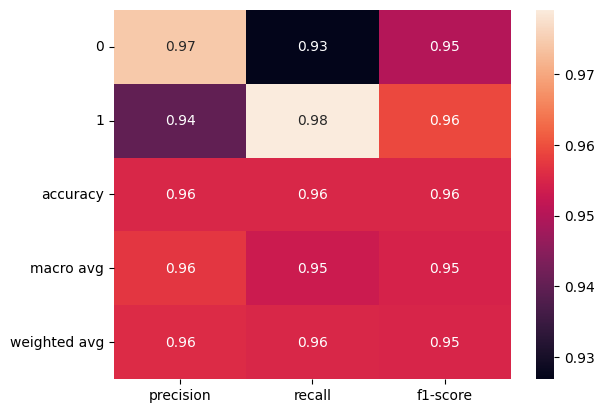

In [195]:
print(classification_report(y_test, y_pred))
clf_report = classification_report(y_test, y_pred,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

In [196]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[38  3]
 [ 1 47]]


##**Feature Importance**

In [197]:
fi = pd.DataFrame({'features':X_train.columns,'importance':dt_clf.feature_importances_}).sort_values(by=['importance'], ascending=False)
fi

,features,importance
2,newbalanceOrig,0.342659
4,oldbalanceOrg,0.331080
0,amount,0.164428
3,oldbalanceDest,0.089403
8,type_encode_3,0.045851
1,newbalanceDest,0.026578
5,type_encode_0,0.000000
6,type_encode_1,0.000000
7,type_encode_2,0.000000
9,type_encode_4,0.000000


<Axes: xlabel='importance', ylabel='features'>

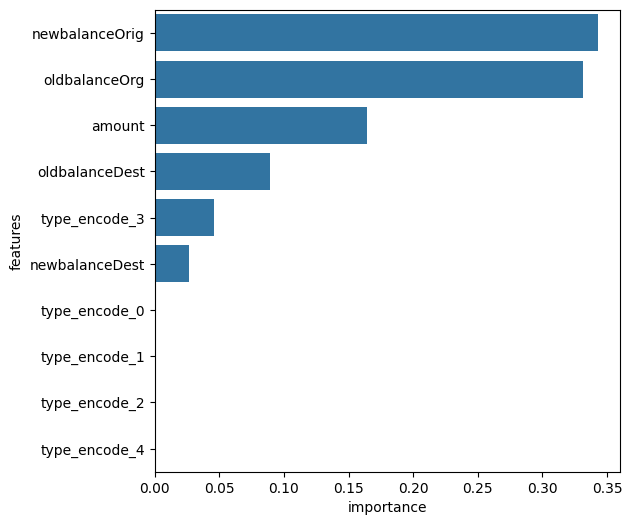

In [199]:
plt.figure(figsize=(6,6))

sns.barplot(x="importance", y="features", data=fi)

### Most Important feature of all seems to be the '**oldbalanceOrg**' i.e. Old Balance of the Reciever along with the '**newbalanceOrig**'

Also to note that transaction type where "Payment" aka type_encode_3 is made, it also makes play a important role rather than other types.

---